#OPeNDAP example
### A dataset measured by [Fibre optic Distributed Temperature Sensor DTS, Maisbich, Luxemburg](https://data.3tu.nl/repository/resource:DL-49880604-DTS)

In [8]:
%matplotlib inline
import urllib
import numpy as np
import pydap as py
import matplotlib
import matplotlib.pyplot as plt
import pylab
import pydap.client as pyc
year = '2008'
month = '08'
root = 'http://opendap.tudelft.nl/thredds/dodsC/data2/darelux/maisbich/Tcalibrated/'
myurl = root+year+'/'+month+'/Tcalibrated'+year+'_'+month+'.nc'
dataset = pyc.open_url(myurl)
keys = dataset.keys()
globatts = dataset.attributes['NC_GLOBAL']
print ''
for g in globatts:
    print g,':',globatts[g]
print ''
for k in keys:
    ds = dataset[k]
    print k,'\n  ',type(ds).__name__,'\n  ',ds.shape,'\n  ',ds.dimensions,'\n  ',ds.attributes


creator : Martijn Westhoff; Wim Luxemburg
description : Calibrated fibre optic Distributed Temperature Sensing (DTS) data, Maisbich, Luxemburg, 2008-08
title : Calibrated DTS data, Maisbich, 2008-08

time 
   BaseType 
   (4924,) 
   ('time',) 
   {'units': 'days since 2008-08-01T00:00:00'}
temperature 
   GridType 
   (4924, 279) 
   ('time', 'distance') 
   {'units': 'deg_Celcius', 'least_significant_digit': 2}
distance 
   BaseType 
   (279,) 
   ('distance',) 
   {'units': 'm'}


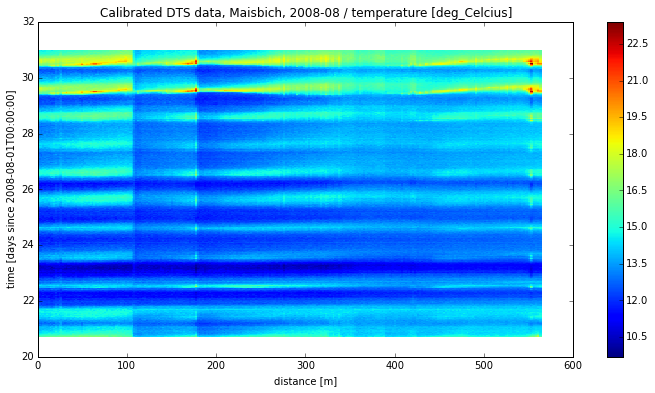

In [98]:
plt.figure(figsize=(12,6))
for k in keys:
    ds = dataset[k]
    dim = ds.dimensions
    if len(dim)==2:
        title = globatts['title']+' / '+k+' ['+ds.units+']'
        part = ds[::10,::1]
        y,x = [part[i][:] for i in dim]
        ylabel,xlabel = [i+' ['+dataset[i].units+']' for i in dim]
        mesh = plt.pcolormesh(x,y,part.array)
        mesh.axes.set_title(title)
        mesh.axes.set_xlabel(xlabel)
        mesh.axes.set_ylabel(ylabel)
        mesh.figure.colorbar(mesh)


In [85]:
mesh.figure.savefig('maisbich-'+year+'-'+month+'.png')
mesh.figure.clf()